# Machine Learning Project - Stock Market Prediction using LSTM

In [47]:
# Data analysis + numerical operations
import pandas as pd
import numpy as np

# Data visualisation - handle dates and plotting
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Date and time manipulation
import datetime as dt

# Machine learning - scaling, error, splitting and cross-validation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit

# LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

## Loading the Data

In [48]:
# Replace sample data with data you want to train the model on
data = pd.read_csv('./sample_data/AMZN.csv', index_col='Date', parse_dates=True) 
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,174.236496,174.332504,168.634995,169.324493,169.324493,117510000
2021-05-04,167.809494,168.399002,163.606506,165.593506,165.593506,108788000
2021-05-05,166.942993,167.735001,163.218002,163.526993,163.526993,74226000
2021-05-06,163.500000,165.720001,162.360001,165.318497,165.318497,88954000
2021-05-07,165.954498,166.544495,164.453506,164.580505,164.580505,94206000


## Visualising the Data

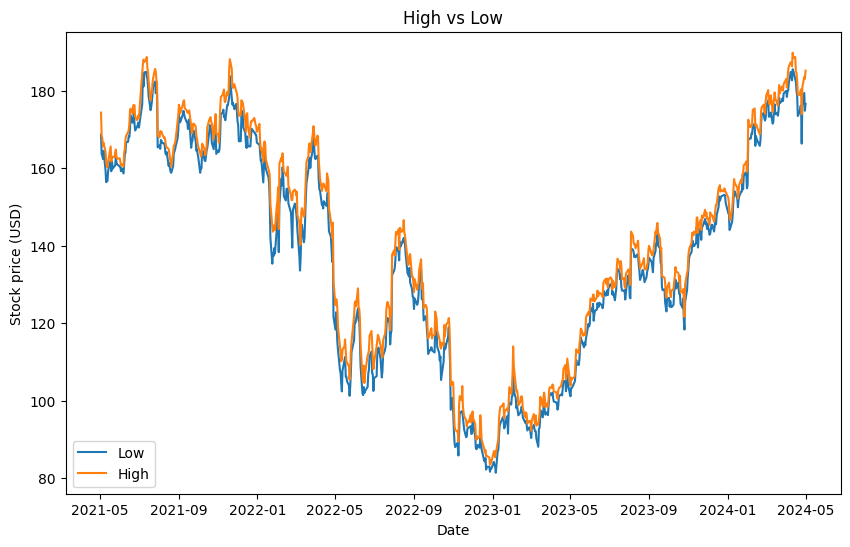

In [49]:
# Plot high vs low data
plt.figure(figsize=(10,6))

plt.plot(data.index.values, data['Low'], label='Low')
plt.plot(data.index.values, data['High'], label='High')

plt.title('High vs Low')
plt.xlabel('Date')
plt.ylabel('Stock price (USD)')
plt.legend()

plt.show()

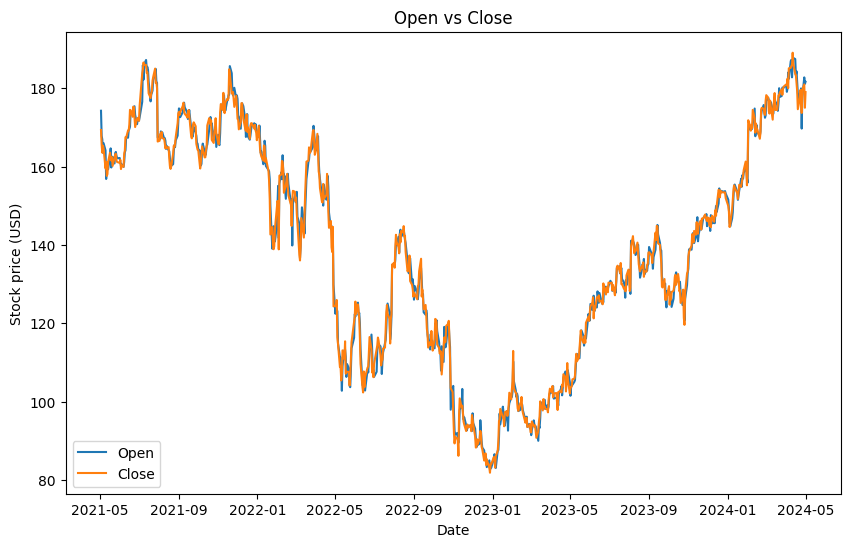

In [50]:
# Plot open vs close data
plt.figure(figsize=(10,6))

plt.plot(data.index.values, data['Open'], label='Open')
plt.plot(data.index.values, data['Close'], label='Close')

plt.title('Open vs Close')
plt.xlabel('Date')
plt.ylabel('Stock price (USD)')
plt.legend()

plt.show()

## Training the LSTM model

In [55]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data, keeping order
train_data, test_data = train_test_split(scaled_data, test_size=0.3, shuffle=False)

# Create LSTM Sequences
def create_sequences(data, length):
    X = []
    y = []

    for i in range(len(data) - length):
        X.append(data[i:i + length])
        y.append(data[i + length])
    return np.array(X), np.array(y)

# Create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Number of time steps (change as needed)
seq_length = 60

# Create sequences for testing and training data
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Create and train model
model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) # Capture training history


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.1317 - val_loss: 0.0206
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0148 - val_loss: 0.0029
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0054 - val_loss: 0.0022
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0049 - val_loss: 0.0026


## Model Evaluation

### Training and Validation Loss

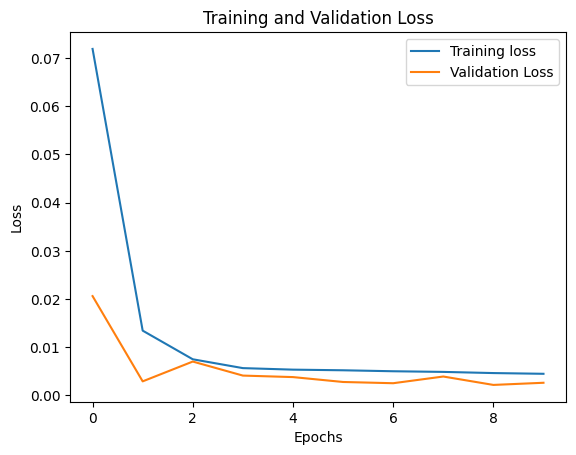

In [57]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### MSE and MAPE

In [58]:
predictions = model.predict(X_test)

# Get actual values and predictions using inverse scaling 
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1,1))

# Calculate MSE and MAPE
mse = mean_squared_error(actual_values, predictions)
mape = mean_absolute_percentage_error(actual_values, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Mean Squared Error: 30.310209297516277
Mean Absolute Percentage Error: 0.03010131456807615
